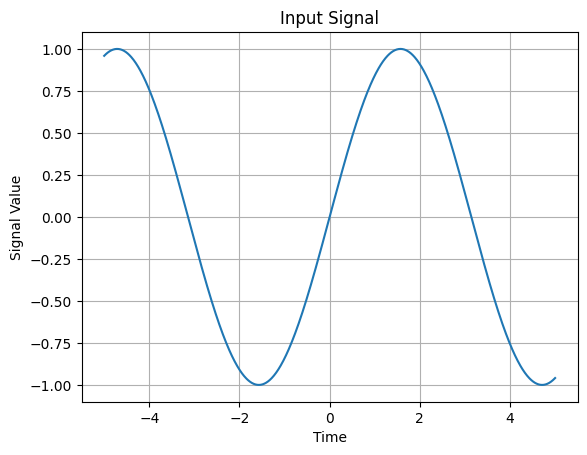

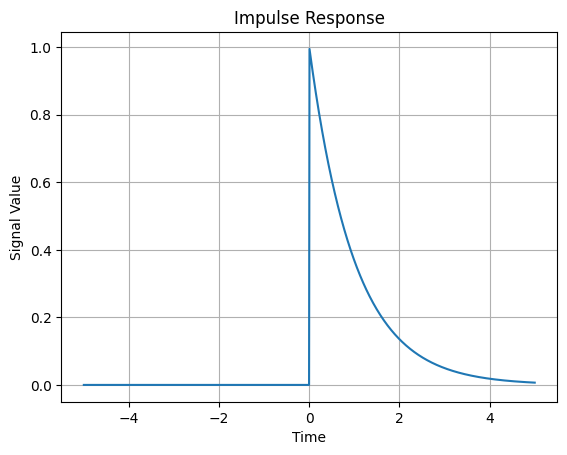

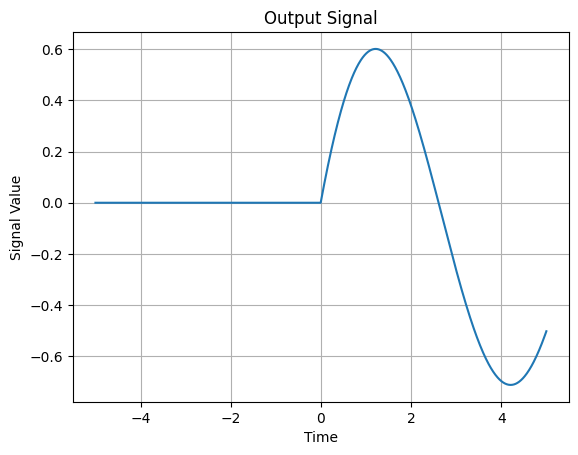

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousSignal:
    def __init__(self, func, time_start, time_end, num_points=1000):
        """
        Initialize the ContinuousSignal with a function representing the signal over a time range.
        :param func: A function representing the signal, takes numpy array as input.
        :param time_start: Start of the time range.
        :param time_end: End of the time range.
        :param num_points: Number of points to sample the signal (default is 1000).
        """
        self.func = func
        self.time_values = np.linspace(time_start, time_end, num_points)
        self.values = self.func(self.time_values)

    def plot(self, title="Continuous Signal"):
        """
        Plot the continuous signal.
        """
        plt.plot(self.time_values, self.values, label=title)
        plt.title(title)
        plt.xlabel("Time")
        plt.ylabel("Signal Value")
        plt.grid()
        plt.show()

class LTI_Continuous:
    def __init__(self, impulse_response):
        """
        Initialize the LTI system with the given continuous impulse response.
        :param impulse_response: An instance of ContinuousSignal representing the impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal, delta):
        """
        Decomposes the input continuous signal into a linear combination of impulses.
        :param input_signal: The input signal (ContinuousSignal instance).
        :param delta: The width of each impulse.
        :return: Impulses and their corresponding coefficients.
        """
        impulses = []
        coefficients = []
        for t in range(len(input_signal.values)):
            coeff = input_signal.values[t] * delta
            if coeff != 0:
                impulses.append(input_signal.time_values[t])
                coefficients.append(coeff)
        return impulses, coefficients

    def output_approx(self, input_signal, delta):
        """
        Computes the output of the system by convolving the input signal with the system's impulse response.
        Uses numerical approximation with delta.
        :param input_signal: The input signal (ContinuousSignal instance).
        :param delta: The impulse width for approximation.
        :return: Output signal as a ContinuousSignal instance.
        """
        time_start = input_signal.time_values[0]
        time_end = input_signal.time_values[-1]
        num_points = len(input_signal.time_values)
        
        # Output signal over the same time range as the input
        output_values = np.zeros(num_points)
        
        # Convolve the input signal with the impulse response
        for i in range(num_points):
            for j in range(num_points):
                if i - j >= 0:
                    output_values[i] += input_signal.values[j] * self.impulse_response.values[i - j] * delta

        # Create the output signal as a new ContinuousSignal
        output_signal = ContinuousSignal(lambda t: np.interp(t, input_signal.time_values, output_values), 
                                         time_start, time_end, num_points)
        return output_signal


# Example Usage
if __name__ == "__main__":
    # Define the time range
    time_start = -5
    time_end = 5
    num_points = 1000

    # Define an impulse response (e.g., exponential decay)
    impulse_response = ContinuousSignal(lambda t: np.exp(-t) * (t >= 0), time_start, time_end, num_points)

    # Define an input signal (e.g., a sine wave)
    input_signal = ContinuousSignal(lambda t: np.sin(t), time_start, time_end, num_points)

    # Create an LTI system with the given impulse response
    lti_system = LTI_Continuous(impulse_response)

    # Plot the input signal and the impulse response
    input_signal.plot("Input Signal")
    impulse_response.plot("Impulse Response")

    # Decompose the input signal into a linear combination of impulses
    delta = (time_end - time_start) / num_points  # Define delta
    impulses, coefficients = lti_system.linear_combination_of_impulses(input_signal, delta)

    # Find the output of the system by approximating the convolution
    output_signal = lti_system.output_approx(input_signal, delta)

    # Plot the output signal
    output_signal.plot("Output Signal")
